In [ ]:
# Heart Attack Prediction Model with Exploratory Data Analysis




## Step 1: Load the Dataset and Initial Exploration
First, we load the dataset and perform an initial exploration to understand its structure and contents.


In [2]:
import pandas as pd

# Load the dataset
file_path = 'heart_attack_prediction_dataset.csv/heart_attack_prediction_dataset.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
dataset.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [4]:
dataset.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


## Step 2: Exploratory Data Analysis (EDA)
Before diving into data cleaning and model preparation, we'll conduct some exploratory data analysis to understand the distributions of variables and their relationships with the target variable (`Heart Attack Risk`).

### 2.1 Age Distribution
We'll start by visualizing the distribution of `Age`.


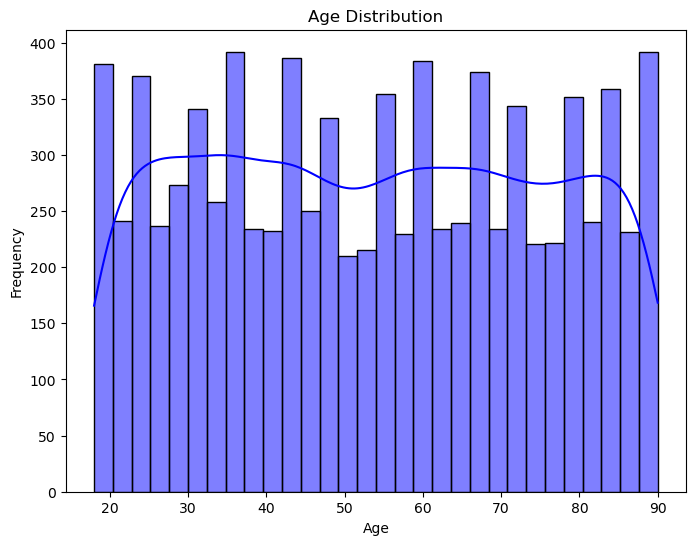

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### 2.2 Cholesterol Distribution
Next, we'll visualize the distribution of `Cholesterol`.


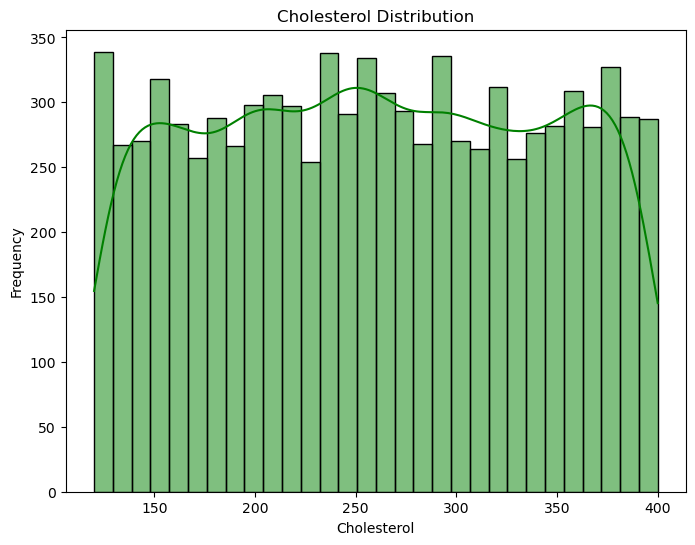

In [6]:
# Cholesterol Distribution
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Cholesterol'], kde=True, bins=30, color='green')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()


### 2.3 Heart Attack Risk by Sex
We'll visualize the distribution of `Heart Attack Risk` based on `Sex`.


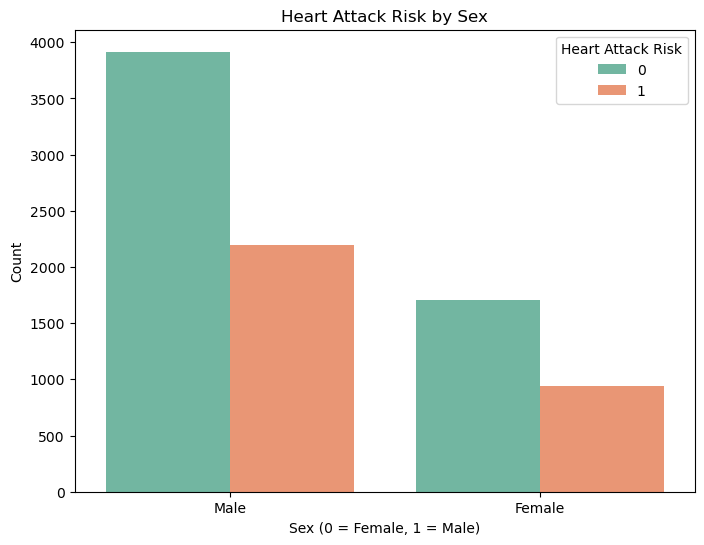

In [7]:
# Heart Attack Risk by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Heart Attack Risk', data=dataset, palette='Set2')
plt.title('Heart Attack Risk by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


### 2.4 Correlation Heatmap
Finally, we'll look at the correlations between all numeric variables to identify any strong relationships that could be important for modeling.


C:\Users\user\AppData\Local\Temp\ipykernel_11276\769073351.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


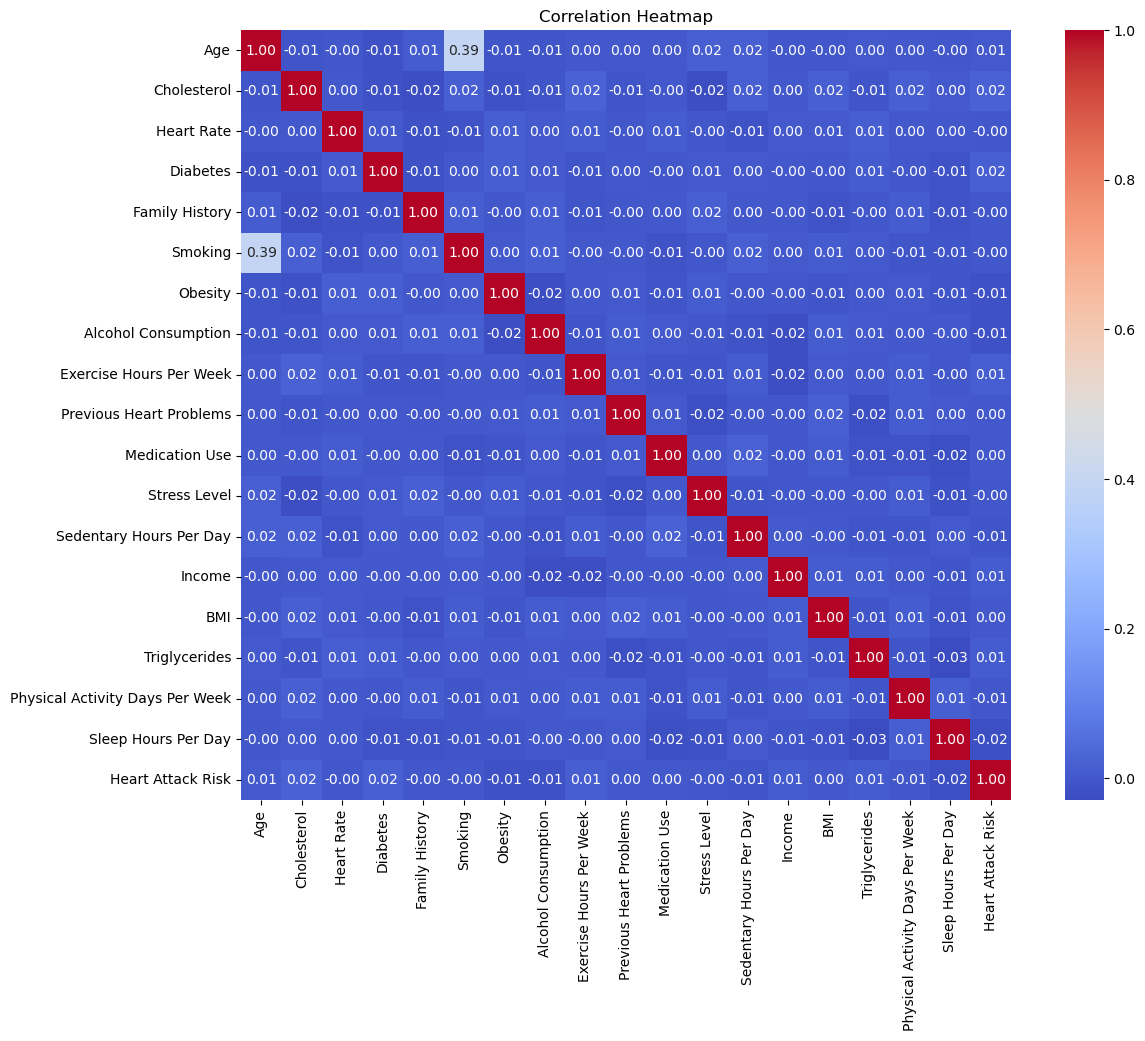

In [8]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


## Step 3: Data Cleaning and Feature Engineering
We'll start by cleaning the data. This involves:
- Parsing and splitting the `Blood Pressure` column.
- Encoding categorical variables such as `Sex` and `Diet`.

### 3.1 Parsing the Blood Pressure Column
We'll split the `Blood Pressure` column into `Systolic_BP` and `Diastolic_BP`.


In [9]:
# Data Cleaning: Parsing the 'Blood Pressure' column
dataset[['Systolic_BP', 'Diastolic_BP']] = dataset['Blood Pressure'].str.split('/', expand=True)

# Convert these new columns to numeric, handling any potential errors
dataset['Systolic_BP'] = pd.to_numeric(dataset['Systolic_BP'], errors='coerce')
dataset['Diastolic_BP'] = pd.to_numeric(dataset['Diastolic_BP'], errors='coerce')

# Drop the original 'Blood Pressure' column as it's now redundant
dataset.drop('Blood Pressure', axis=1, inplace=True)

# Convert 'Sex' to a binary variable (1 = Male, 0 = Female)
dataset['Sex'] = dataset['Sex'].map({'Male': 1, 'Female': 0})

# Check for any missing values in the dataset
missing_values = dataset.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values


Series([], dtype: int64)

### 3.2 Encoding Categorical Data
We identified that the `Diet` column contains categorical data. We'll encode this column into numerical values.


In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Diet' column
label_encoder = LabelEncoder()
dataset['Diet'] = label_encoder.fit_transform(dataset['Diet'])

# Define features (X) and target (y)
X = dataset.drop(columns=['Patient ID', 'Heart Attack Risk', 'Country', 'Continent', 'Hemisphere'])
y = dataset['Heart Attack Risk']

# Verify non-numeric columns are handled
non_numeric_columns = X.select_dtypes(include=['object']).columns
non_numeric_columns_data = {col: X[col].unique() for col in non_numeric_columns}
non_numeric_columns_data


{}

## Step 4: Model Training and Evaluation
Now that our data is clean and ready, we'll proceed with training a RandomForestClassifier and evaluate its performance.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training: Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy

0.6440387906446092

In [14]:
print(report)

              precision    recall  f1-score   support

           0       0.65      0.99      0.78      1125
           1       0.56      0.03      0.05       628

    accuracy                           0.64      1753
   macro avg       0.60      0.51      0.42      1753
weighted avg       0.62      0.64      0.52      1753



## Conclusion
The model achieved an accuracy of approximately 64.4%.
